# JS and Cat Image Eigenvalue Reduction through SVD, U * Sigma * V.T

In [1]:
import numpy as np
from numpy.linalg import multi_dot

%matplotlib inline
import numpy as np

from matplotlib.pyplot import *
from pylab import subplots, show
import matplotlib.pyplot as plt

import PIL as pl
from PIL import Image

In [2]:
# Number of Eigenvalues to be Reduced to
n = 5

In [3]:
# Original Image Matrix
J = plt.imread('JS2_1024.JPG')

# Red Channel
J = J[:,:,0]

# J_Cond = np.linalg.cond(J)
# print('\n Condition Number of Isolated Channel - Red')
# print(J_Cond)
# Condition Number: 9576222.885843676

# print('\n Original J')
# print(J)

UJ, DJ, VJ = np.linalg.svd(J)

# print('\n UJ')
# print(UJ)

# print('\n diagonal of DJ')
# print(np.diag(DJ))

# print('\n VJ')
# print(VJ)

# Reconstructed Image Matrix, U * Sigma * V.T
reconJ = multi_dot([UJ,np.diag(DJ),VJ])

# print('\n Recon J')
# print(reconJ)

# Verification that Reconstructed Image Matrix = Original Matrix
# Output Should be True
print('\n Recon J = J, (Recon J Not Reduced)')
print(np.allclose(reconJ, J))

# print('\n')

# Number of Eigenvalues to be Reduced to
#n = 1024
#n = 50
# n = 10

reconJ1 = multi_dot([UJ[:,:n], np.diag(DJ[:n]), VJ[:n,:]])

# print('\n Reduced UJ shape')
# print(UJ[:,:n].shape)

# print('\n Reduced diagonal of DJ shape')
# print(np.diag(DJ[:n]).shape)

# print('\n Reduced VJ shape')
# print(VJ[:n,:].shape)

# print('\n Recon J1 (Reducing)')
# print(reconJ1)

# Verification that Eigenvalue Reduced Reconstructed Image Matrix = Original Matrix
# Output Should be False
print('\n Recon J1 = J, (Recon J1 Reduced)')
print(np.allclose(reconJ1, J))


 Recon J = J, (Recon J Not Reduced)
True

 Recon J1 = J, (Recon J1 Reduced)
False


Text(0.5, 1.0, 'ReconJ1, Eigenvalues = 5, Red Channel')

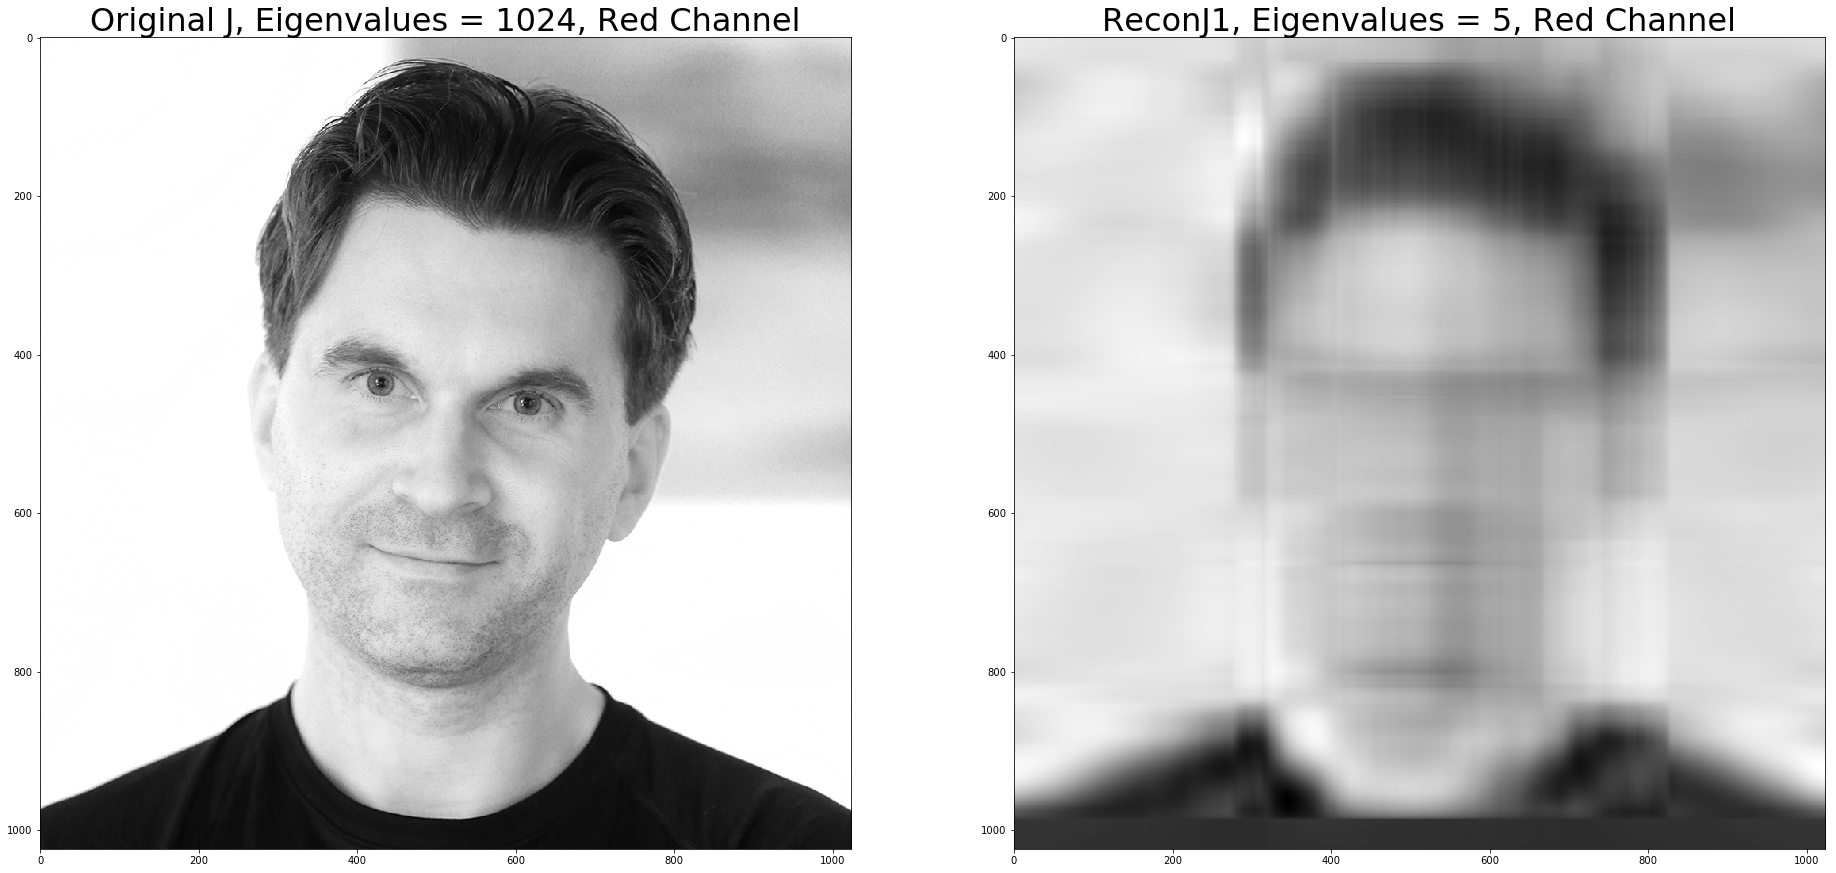

In [6]:
cmap = cm.gray

figs = 32 # figsize
fts = 32 # fontsize

fig, axes = subplots(1,2, figsize = (figs,figs))

axes[0].imshow(J, cmap = cmap, interpolation = "nearest")
axes[0].set_title('Original J, Eigenvalues = 1024, Red Channel', fontsize = fts)

axes[1].imshow(reconJ1, cmap = cmap, interpolation = "nearest")
axes[1].set_title('ReconJ1, Eigenvalues = 5, Red Channel', fontsize = fts)

In [5]:
# Cat Image

Cat = plt.imread('cat_1024.jpg')

Cat = Cat[:,:,0]

# Cat_Cond = np.linalg.cond(Cat)
# print('\n Condition Number of Isolated Channel - Red')
# print(Cat_Cond)
# Condition Number: 2832332.9480729117

# print('\n Original Cat')
# print(Cat)

UCat, DCat, VCat = np.linalg.svd(Cat)

# print('\n UCat')
# print(UCat)

# print('\n diagonal of DCat')
# print(np.diag(DCat))

# print('\n VCat')
# print(VCat)

reconCat = multi_dot([UCat,np.diag(DCat),VCat])

# print('\n Recon Cat')
# print(reconCat)

# Verification that Reconstructed Image Matrix = Original Matrix
# Output Should be True
print('\n Recon Cat = Cat, (Recon Cat Not Reduced)')
print(np.allclose(reconCat, Cat))

# print('\n')

# Number of Eigenvalues to be Reduced to
#n = 1024
#n = 50
# n = 5

reconCat1 = multi_dot([UCat[:,:n], np.diag(DCat[:n]), VCat[:n,:]])

# print('\n Reduced UCat shape')
# print(UCat[:,:n].shape)

# print('\n Reduced diagonal of DCat shape')
# print(np.diag(DCat[:n]).shape)

# print('\n Reduced VCat shape')
# print(VCat[:n,:].shape)

# print('\n Recon Cat1 (Reducing)')
# print(reconCat1)

# Verification that Eigenvalue Reduced Reconstructed Image Matrix = Original Matrix
# Output Should be False
print('\n Recon Cat1 = Cat, (Recon Cat1 Reduced)')
print(np.allclose(reconCat1, Cat))


 Recon Cat = Cat, (Recon Cat Not Reduced)
True

 Recon Cat1 = Cat, (Recon Cat1 Reduced)
False


Text(0.5, 1.0, 'ReconCat1, Eigenvalues = 5, Red Channel')

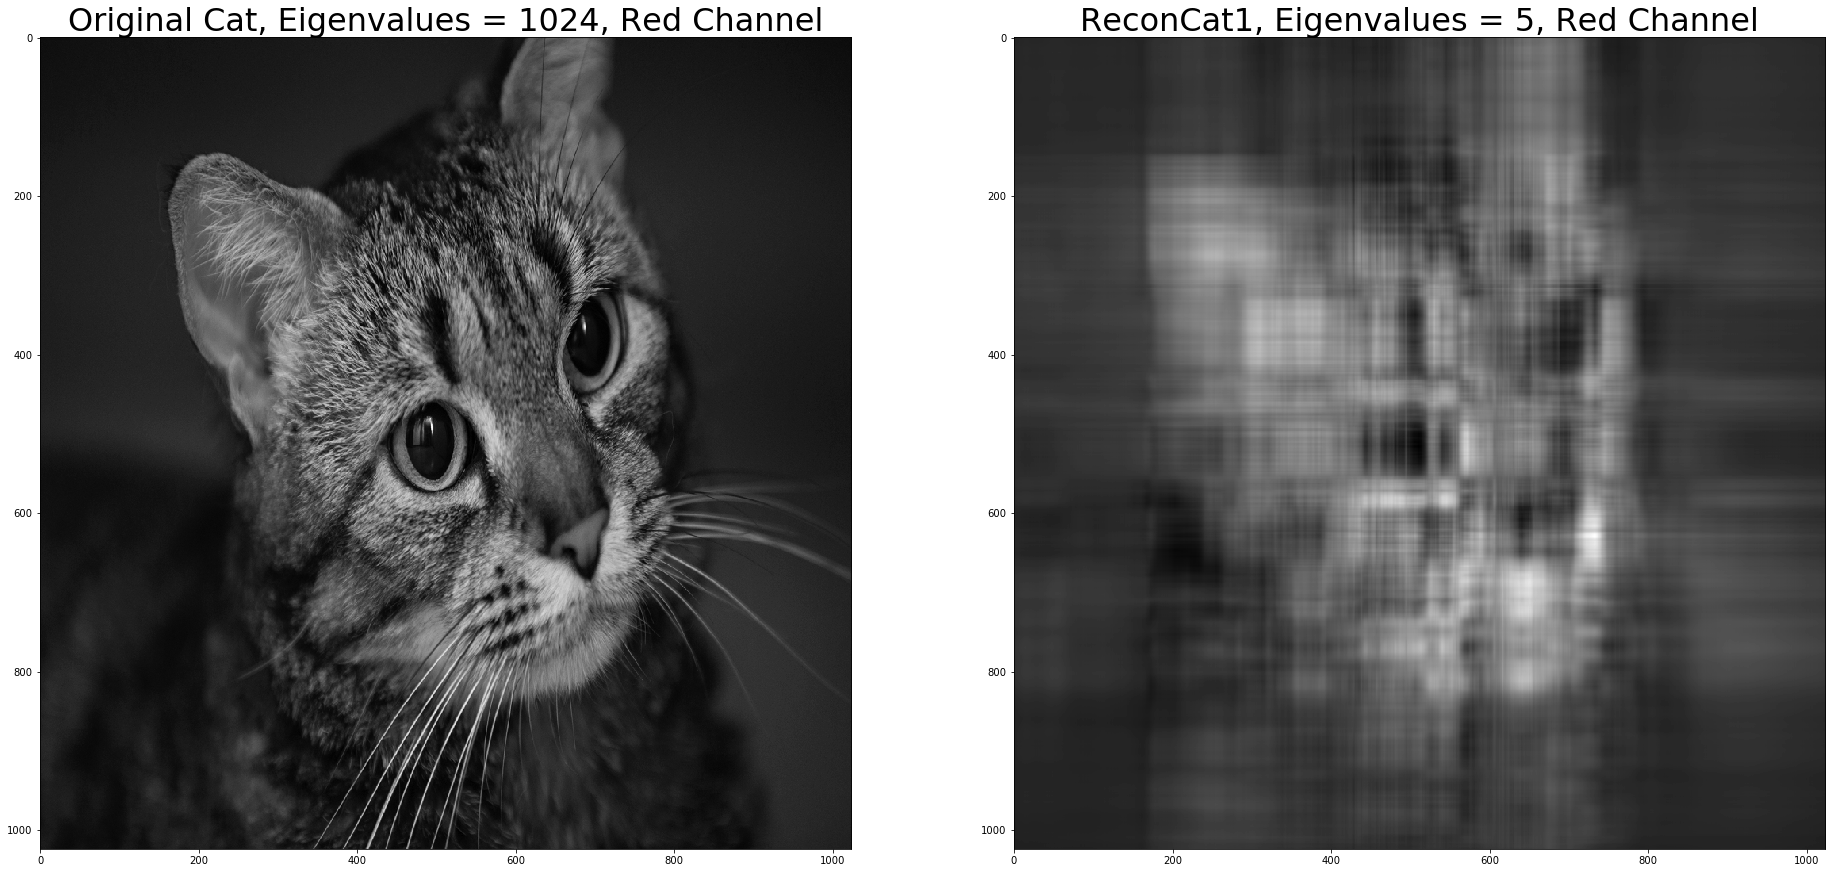

In [7]:
cmap = cm.gray

figs = 32 # figsize
fts = 32 # fontsize

fig, axes = subplots(1,2, figsize = (figs,figs))

axes[0].imshow(Cat, cmap = cmap, interpolation = "nearest")
axes[0].set_title('Original Cat, Eigenvalues = 1024, Red Channel', fontsize = fts)

axes[1].imshow(reconCat1, cmap = cmap, interpolation = "nearest")
axes[1].set_title('ReconCat1, Eigenvalues = 5, Red Channel', fontsize = fts)


 Verification: ReconJ1 Not Equal to mix_J_recon_Cat_eig
False

 Verification: reconCat1 Not Equal to mix_J_recon_Cat_eig
False


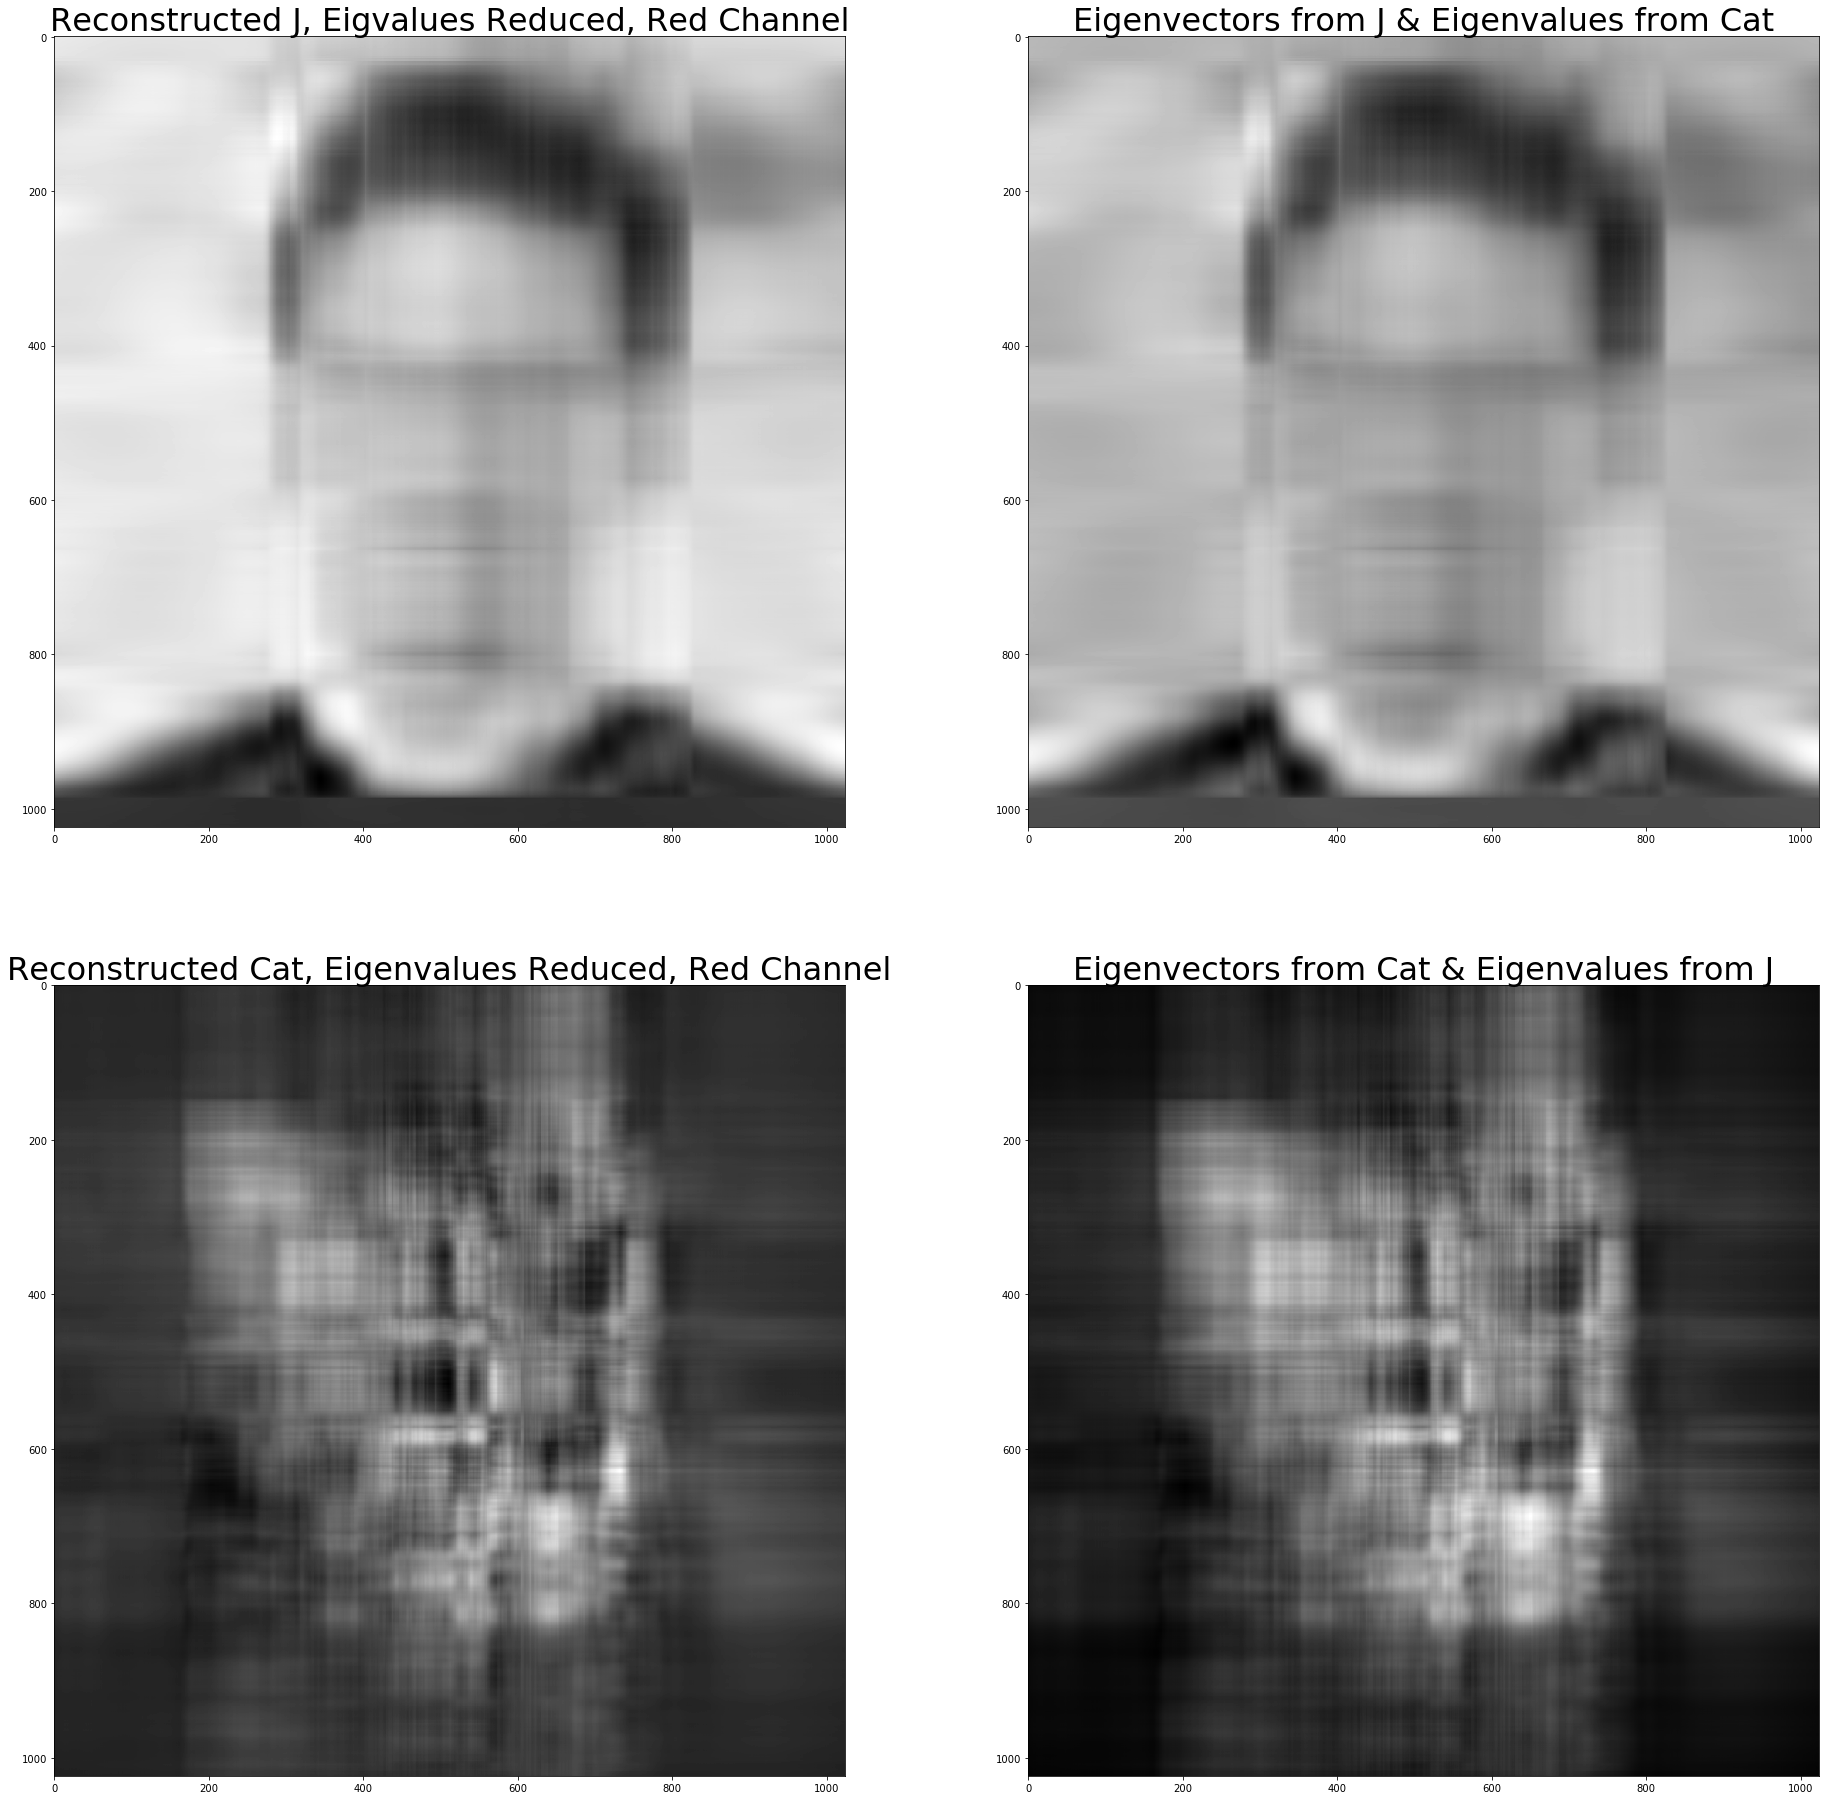

In [12]:
# Mixing J and Cat

#n = 1024
#n = 500
#n = 100
#n = 50
#n = 10
n = 5

# Mix the eigenvectors from J with the eigenvalues from Cat
mix_J_recon_Cat_eig = multi_dot([UJ[:,:n], np.diag(DCat[:n]), VJ[:n,:]])

# Mix the eigenvectors from Cat with the eigenvalues from J
mix_Cat_recon_J_eig = multi_dot([UCat[:,:n], np.diag(DJ[:n]), VCat[:n,:]])

#cmap = cm.rainbow
#cmap = cm.prism_r
cmap = cm.gray

figs = 32 # figsize
fts = 32 # fontsize

fig, axes = subplots(2,2, figsize = (figs,figs))

axes[0,0].imshow(reconJ1, cmap = cmap, interpolation = "nearest")
axes[0,0].set_title('Reconstructed J, Eigvalues Reduced, Red Channel', fontsize = fts)

axes[0,1].imshow(mix_J_recon_Cat_eig, cmap = cmap, interpolation = "nearest")
axes[0,1].set_title('Eigenvectors from J & Eigenvalues from Cat', fontsize = fts)

axes[1,0].imshow(reconCat1, cmap = cmap, interpolation = "nearest")
axes[1,0].set_title('Reconstructed Cat, Eigenvalues Reduced, Red Channel', fontsize = fts)

axes[1,1].imshow(mix_Cat_recon_J_eig, cmap = cmap, interpolation = "nearest")
axes[1,1].set_title('Eigenvectors from Cat & Eigenvalues from J', fontsize = fts)

# Verification that Reconstructed J1 not equal to Mixture of J Eigenvectors and Cat Eigenvalues
print('\n Verification: ReconJ1 Not Equal to mix_J_recon_Cat_eig')
print(np.allclose(reconJ1, mix_J_recon_Cat_eig))

# Verification that Reconstructed J1 not equal to Mixture of J Eigenvectors and Cat Eigenvalues
print('\n Verification: reconCat1 Not Equal to mix_J_recon_Cat_eig')
print(np.allclose(reconCat1, mix_Cat_recon_J_eig))

In [16]:
# JS Image - Color

J = plt.imread('JS2_1024.JPG')

Jred = J[:,:,0]
Jgreen = J[:,:,1]
Jblue = J[:,:,2]


################### Red Channel ###################

# J_Cond_Red = np.linalg.cond(Jred)
# print('\n Condition Number of Isolated Channel - Red')
# print(J_Cond_Red)
# Condition Number: 9576222.88593639

UJr, DJr, VJr = np.linalg.svd(Jred)

reconJred = multi_dot([UJr,np.diag(DJr),VJr])

# print('\n Recon Jred = Jred, (Recon Jred Not Reduced)')
# print(np.allclose(reconJred, Jred))

#n = 1024
#n = 50
#n = 10
n = 5

reconJred1 = multi_dot([UJr[:,:n], np.diag(DJr[:n]), VJr[:n,:]])

# print('\n Reduced UJr shape')
# print(UJr[:,:n].shape)

# print('\n Reduced diagonal of DJr shape')
# print(np.diag(DJr[:n]).shape)

# print('\n Reduced VJr shape')
# print(VJr[:n,:].shape)

# print('\n Recon Jred1 (Reducing)')
# print(reconJred1)

# print('\n Recon Jred1 = Jred, (Recon Jred1 Reduced)')
# print(np.allclose(reconJred1, Jred))


################### Green Channel ###################


# J_Cond_Green = np.linalg.cond(Jgreen)
# print('\n Condition Number of Isolated Channel - Green')
# print(J_Cond_Green)
# Condition Number: 9310277.201741511

UJg, DJg, VJg = np.linalg.svd(Jgreen)

reconJgreen = multi_dot([UJg,np.diag(DJg),VJg])

# print('\n Recon Jgreen = Jgreen, (Recon Jgreen Not Reduced)')
# print(np.allclose(reconJgreen, Jgreen))

#n = 1024
#n = 50
#n = 10
n = 5

reconJgreen1 = multi_dot([UJg[:,:n], np.diag(DJg[:n]), VJg[:n,:]])

# print('\n Reduced UJg shape')
# print(UJg[:,:n].shape)

# print('\n Reduced diagonal of DJg shape')
# print(np.diag(DJg[:n]).shape)

# print('\n Reduced VJg shape')
# print(VJg[:n,:].shape)

# print('\n Recon Jgreen1 (Reducing)')
# print(reconJgreen1)

# print('\n Recon Jgreen1 = Jgreen, (Recon Jgreen1 Reduced)')
# print(np.allclose(reconJgreen1, Jgreen))


################### Blue Channel ###################


# J_Cond_Blue = np.linalg.cond(Jblue)
# print('\n Condition Number of Isolated Channel - Blue')
# print(J_Cond_Blue)
# Condition Number: 60713009.42979233

UJb, DJb, VJb = np.linalg.svd(Jblue)

reconJblue = multi_dot([UJb,np.diag(DJb),VJb])

# print('\n Recon Jblue = Jblue, (Recon Jblue Not Reduced)')
# print(np.allclose(reconJblue, Jblue))

#n = 1024
#n = 50
#n = 10
n = 5

reconJblue1 = multi_dot([UJb[:,:n], np.diag(DJb[:n]), VJb[:n,:]])

# print('\n Reduced UJb shape')
# print(UJb[:,:n].shape)

# print('\n Reduced diagonal of DJb shape')
# print(np.diag(DJb[:n]).shape)

# print('\n Reduced VJb shape')
# print(VJb[:n,:].shape)

# # print('\n Recon Jblue1 (Reducing)')
# # print(reconJred1)

# print('\n Recon Jblue1 = Jblue, (Recon Jblue1 Reduced)')
# print(np.allclose(reconJblue1, Jblue))

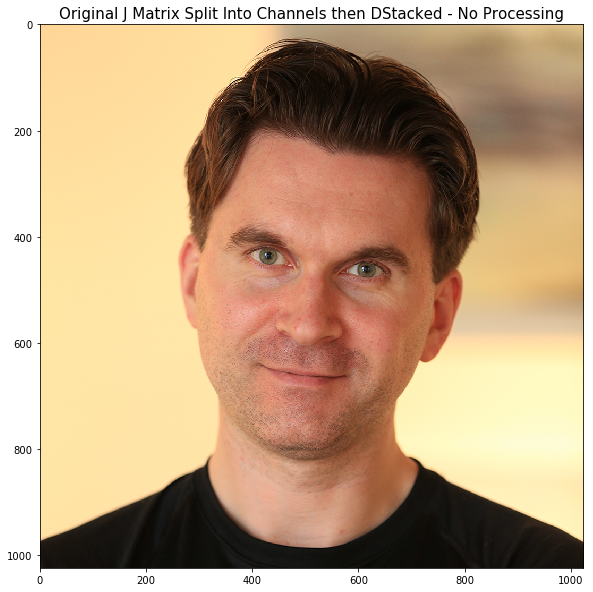

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


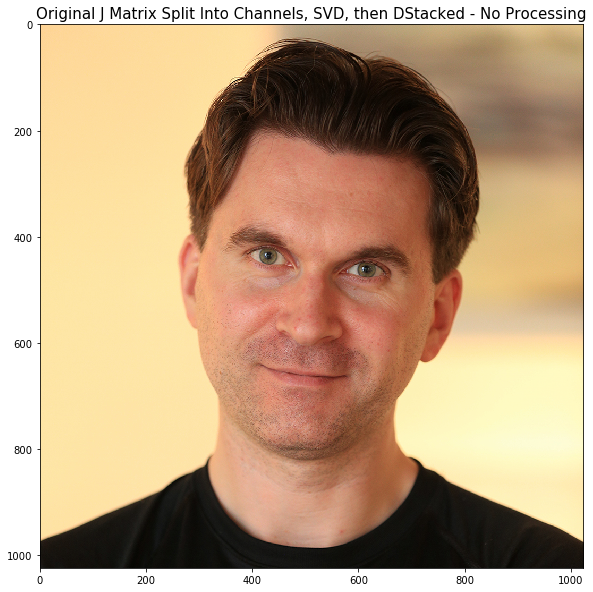

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


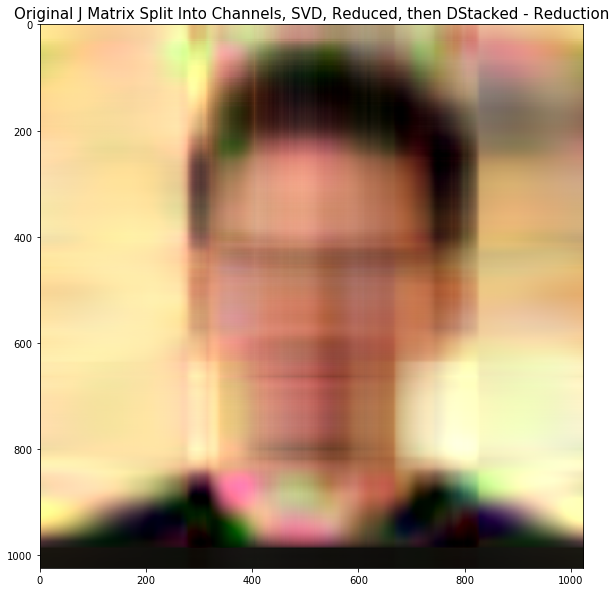


 Verification: J_RGB_Stack_Orig = J Original, for n = 1024 only
True

 Verification: J_RGB_Stack_Split2 = J Original, for n = 1024 only
False

 Verification: J_RGB_Stack_Reduced2 = J Original, for n = 1024 only
False


In [17]:
# JS Image - Color - Stacking

figs = 10 # figsize
fts = 15 # fontsize

# Original J Matrix Split Into Channels then DStacked - No Processing

figure(figsize = (figs,figs))
J_RGB_Stack_Orig = np.dstack((Jred, Jgreen, Jblue))
plt.imshow(J_RGB_Stack_Orig)
plt.title('Original J Matrix Split Into Channels then DStacked - No Processing', fontsize = fts)
plt.show()

# Original J Matrix Split Into Channels, SVD Separation into U Sigma and V, then DStacked - No Processing

figure(figsize = (figs,figs))
J_RGB_Stack_Split1 = np.dstack((reconJred, reconJgreen, reconJblue))
J_RGB_Stack_Split2 = J_RGB_Stack_Split1/255
plt.imshow(J_RGB_Stack_Split2)
plt.title('Original J Matrix Split Into Channels, SVD, then DStacked - No Processing', fontsize = fts)
plt.show()

# Original J Matrix Split Into Channels, SVD Separation, Reduced, then DStacked - Reduction

figure(figsize = (figs,figs))
J_RGB_Stack_Reduced1 = np.dstack((reconJred1, reconJgreen1, reconJblue1))
J_RGB_Stack_Reduced2 = J_RGB_Stack_Reduced1/255
plt.imshow(J_RGB_Stack_Reduced2)
plt.title('Original J Matrix Split Into Channels, SVD, Reduced, then DStacked - Reduction', fontsize = fts)
plt.show()

print('\n Verification: J_RGB_Stack_Orig = J Original, for n = 1024 only')
print(np.allclose(J_RGB_Stack_Orig, J))

print('\n Verification: J_RGB_Stack_Split2 = J Original, for n = 1024 only')
print(np.allclose(J_RGB_Stack_Split2, J))

print('\n Verification: J_RGB_Stack_Reduced2 = J Original, for n = 1024 only')
print(np.allclose(J_RGB_Stack_Reduced2, J))